# Project: Fleet Quality Analysis For Food Delivery App.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Quest">Research Points</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Actions">Suggested Actions</a></li>
    
</ul>

<a id='intro'></a>
## Introduction




> **Background:**
This investigation is for a food delivery application that helps people discover and order the food they will love. We have been largely focused on the food delivery and online ordering experience and our traction has been exponential. We aim to grow through a diverse set of channels while maintaining healthy economics.


> **The dataset description:**

* Driver_Id: ID.
* Date: Order date.
* Pool: Delivery area.
* Delivery_Time: The duration from customer request till order arrived.
* Trip_Duration: The duration from runner acceptance till order arrived.
* Pending_to_Dispatch: The duration from dispatch the order by user till accepted by runner.
* FM: The duration from runner acceptance till arrived at restaurant.
* EFM: The estimated duration from runner acceptance till arrived at restaurant through google map.
* Waiting_Time: Waiting time in restaurant after driver arrived and before receiving order.
* LM: The duration from receiving the order from the restaurant till order arrived.
* ELM : The estimated duration from receiving the order from the restaurant till order arrived.
* Delivered: Delivery status (0 or 1).
* Total_Distance: Total distance between restaurant and customer address.
* Hour: Order hour.
* Late_FM: EFM - FM.
* Late_LM: ELM - LM.
* Total_Late: Late_FM + Late_LM.
* Lateness_status: late or not (1 or 0).

<a id='Quest'></a>
## **Research Points:**


1. Delivery duration Per pool.
2. The percentage of late trip per pool.
3. The percentage of violators with late trips per pool.
4. Your Action plan to enhance the violators % per pool.
5. Initiatives to decrease overall delivery duration.
6. Initiatives to automate our runners onboarding process.   

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style("whitegrid")

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [2]:
# loading CSV files in to 3 Dataframes  //patients, treatments and adverse reaction//

data = pd.read_csv("Row Data.csv")

In [3]:
#checking 5 rows sample from Dataframes

data.head(5)

,week,hour,Trip ID,Pool,minute,Delivery Time,Trip_Duration,First Mile,EFM,Waiting Time,...,restaurant_name_en,stacked,reason,Total_Distance,order_time,AHT,Pending_to_Dispatch,order_short_code,trip_short_code,queued
0,26,16,0001c4cb-3524-4bfe-8efe-e7ec5bd2ebfc,Madinaty,19,58.8000,45.3500,0.2000,0.000000,14.5167,...,Koshary Sayed Hanafy,1,NaN,1.943,16,8.8167,13.3667,r7nz3w7,rwd45l,0
1,27,22,00077608-5971-4eb2-a29c-a70da07d2937,M.D.A.Z,9,32.9000,25.4500,7.6500,5.250000,10.2333,...,Bon Appetit,0,NaN,4.306,22,1.4333,7.2333,domldk7,qyr45r,0
2,26,14,000a4aaa-e5c4-4d87-ab6f-396a0c8a4a52,Madinaty,37,48.1167,37.6333,0.0500,0.016667,20.5833,...,Chicken FilA,0,NaN,4.921,14,1.0167,10.2333,n9n835v,nm35og,0
3,26,13,001621ca-df8f-40f4-92df-281511382774,Maadi - Corniche,14,NaN,NaN,4.6667,4.483333,NaN,...,Dunkin',0,CANCELED_CHANGED_MY_MIND,NaN,13,0.0167,0.0000,vyn42o7,6odozy,0
4,27,13,0016346b-f597-474e-b490-3931db745a99,M.D.A.Z,34,16.0667,15.8167,2.1000,2.633333,7.2000,...,Bon Appetit,0,NaN,0.679,13,26.2833,0.1500,n9n622v,vro5vg,0


In [4]:
data.columns

Index(['week', 'hour', 'Trip ID', 'Pool', 'minute', 'Delivery Time',
       'Trip_Duration', 'First Mile', 'EFM', 'Waiting Time', 'Last Mile',
       'ELM', 'OFD_Arrived', 'Arrived_to_Delivered', 'Cooking time',
       'Cancelation time', 'Canc_time', 'Delv_time', 'SR%', 'user_uuid',
       'driver_uuid', 'created_by', 'count(ol.device_id)', 'provider_name',
       'status', 'branch_zone', 'User_zone', 'pending_time',
       'restaurant_name_en', 'stacked', 'reason', 'Total_Distance',
       'order_time', 'AHT', 'Pending_to_Dispatch', 'order_short_code',
       'trip_short_code', 'queued'],
      dtype='object')

In [5]:
# Select important features 

X =  ['driver_uuid','pending_time','Pool', 
      'Delivery Time','Trip_Duration','Pending_to_Dispatch',
      'First Mile', 'EFM', 'Waiting Time', 'Last Mile','ELM', 
      'OFD_Arrived', 'Arrived_to_Delivered','SR%', 'Total_Distance',"hour" ]

In [6]:
# make dataframe from important variables only

df = data[X].copy()

In [7]:
df.head(5)

,driver_uuid,pending_time,Pool,Delivery Time,Trip_Duration,Pending_to_Dispatch,First Mile,EFM,Waiting Time,Last Mile,ELM,OFD_Arrived,Arrived_to_Delivered,SR%,Total_Distance,hour
0,b3c87577-82d9-4838-bb20-ffcb8ee6926a,26/05/22 14:19,Madinaty,58.8000,45.3500,13.3667,0.2000,0.000000,14.5167,30.6333,5.0333,27.8500,2.7833,100,1.943,16
1,b303350f-6ab4-4040-bc8b-dd7d5c9d9a47,27/05/22 20:09,M.D.A.Z,32.9000,25.4500,7.2333,7.6500,5.250000,10.2333,7.5667,7.5167,5.6333,1.9333,100,4.306,22
2,2d2abec1-01ee-4a18-b66c-188e29be9629,26/05/22 12:37,Madinaty,48.1167,37.6333,10.2333,0.0500,0.016667,20.5833,17.0000,11.6167,14.8833,2.1167,100,4.921,14
3,71e1e8fe-eeed-4e31-8105-624563b0ae8b,26/05/22 11:14,Maadi - Corniche,NaN,NaN,0.0000,4.6667,4.483333,NaN,NaN,NaN,NaN,NaN,0,NaN,13
4,bdac66b3-0314-49db-98d1-1875bc7c2d0c,27/05/22 11:34,M.D.A.Z,16.0667,15.8167,0.1500,2.1000,2.633333,7.2000,6.5167,2.1167,3.6833,2.8333,100,0.679,13


### Assessing Data

In [8]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17146 entries, 0 to 17145
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   driver_uuid           17006 non-null  object 
 1   pending_time          17146 non-null  object 
 2   Pool                  17142 non-null  object 
 3   Delivery Time         16573 non-null  float64
 4   Trip_Duration         16570 non-null  float64
 5   Pending_to_Dispatch   17006 non-null  float64
 6   First Mile            16844 non-null  float64
 7   EFM                   16988 non-null  float64
 8   Waiting Time          16718 non-null  float64
 9   Last Mile             16569 non-null  float64
 10  ELM                   16696 non-null  float64
 11  OFD_Arrived           16649 non-null  float64
 12  Arrived_to_Delivered  16567 non-null  float64
 13  SR%                   17146 non-null  int64  
 14  Total_Distance        16693 non-null  float64
 15  hour               

In [9]:
#checking Dataframe shape (number of rows and columns)

df.shape

(17146, 16)

In [10]:
#checking more information and descriptive statistics

df.describe()

,Delivery Time,Trip_Duration,Pending_to_Dispatch,First Mile,EFM,Waiting Time,Last Mile,ELM,OFD_Arrived,Arrived_to_Delivered,SR%,Total_Distance,hour
count,16573.000000,16570.000000,17006.000000,16844.000000,16988.000000,16718.000000,16569.000000,16696.000000,16649.000000,16567.000000,17146.000000,16693.000000,17146.000000
mean,45.786337,35.354211,10.406107,8.763672,6.686904,10.389564,16.269572,10.149189,12.573875,3.712404,96.349003,6.644990,16.807594
std,29.055363,26.900846,10.584207,18.997337,4.993491,10.622078,16.528745,4.693548,11.300878,11.699819,18.756078,4.005375,4.337499
min,1.616700,0.166700,0.000000,-43.650000,0.000000,-25.733300,0.050000,0.033300,0.016700,0.016700,0.000000,0.102000,0.000000
25%,31.900000,23.600000,2.816700,2.583300,3.266667,2.483300,9.550000,6.850000,6.916700,0.900000,100.000000,3.819000,15.000000
50%,42.200000,32.083300,9.025000,6.533300,5.883333,7.416700,13.916700,9.633300,10.683300,2.333300,100.000000,5.871000,17.000000
75%,54.916700,43.066700,15.183300,11.916700,9.250000,15.112525,19.816700,12.716700,15.816700,4.183300,100.000000,8.596000,20.000000
max,2198.800000,2179.800000,197.983300,2179.566700,90.650000,219.683300,926.950000,56.066700,926.916700,882.533300,100.000000,50.814000,23.000000


**From above summary we can see that:**
> * the maximum value is so large in almost all columns.
> * the minmum values is upnormal in many columns.

**So we need to check outliers, typing mistakes and any thing affects these values.**

In [11]:
# checking for NaN values patients

df.isnull().sum()

driver_uuid             140
pending_time              0
Pool                      4
Delivery Time           573
Trip_Duration           576
Pending_to_Dispatch     140
First Mile              302
EFM                     158
Waiting Time            428
Last Mile               577
ELM                     450
OFD_Arrived             497
Arrived_to_Delivered    579
SR%                       0
Total_Distance          453
hour                      0
dtype: int64

**There are alot of empty cells in this dataset which may affect our statistics accurecy. We can not ignore,drop or replace all cells with empty values.**

In [12]:
#checking for duplicated rows 

df[df.duplicated(keep=False)]

,driver_uuid,pending_time,Pool,Delivery Time,Trip_Duration,Pending_to_Dispatch,First Mile,EFM,Waiting Time,Last Mile,ELM,OFD_Arrived,Arrived_to_Delivered,SR%,Total_Distance,hour
6696,NaN,25/05/22 22:55,Nasr City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
13382,NaN,25/05/22 22:55,Nasr City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [13]:
# Check number of unique values

df.nunique()

driver_uuid             1067
pending_time            1896
Pool                      25
Delivery Time           4494
Trip_Duration           3955
Pending_to_Dispatch     2185
First Mile              2071
EFM                     1305
Waiting Time            2372
Last Mile               2661
ELM                     1493
OFD_Arrived             2274
Arrived_to_Delivered    1193
SR%                        2
Total_Distance          9320
hour                      17
dtype: int64

<a id='clean'></a>

## Data Cleaning 


### <font color='blue'>Tidiness issues</font>


1. Extract date from pending_time and change pending_time data type into date 


### <font color='blue'>Quality issues</font>

1. Change columns names (remove spaces and make names more descriptive) for readability and accessibility.
2. remove duplicates 
3. Add 3 columns LM_Late, FM_Late and Total_Late.
4. change  SR% column values into 0 and 1 then make column data type boolean.
5. Check outliers and drop the upnormal values
6. Add new column for lateness status
7. Add new columns for Day and Month.

In [14]:
# make copy of origenal dataframes to clean them

df_clean = df.copy()

### <font color='blue'>Tidiness issues</font>

#### 1. Extract date from pending_time and change pending_time data type into date

In [15]:
df_clean.pending_time = df_clean.pending_time.apply(lambda x:x.split(" ")[0])

In [16]:
df_clean.pending_time = pd.to_datetime(df_clean.pending_time )

In [17]:
# confirm changes

df_clean.pending_time.sample(5)

386     2022-05-27
10000   2022-05-26
13900   2022-05-26
4224    2022-05-27
13950   2022-05-26
Name: pending_time, dtype: datetime64[ns]

In [18]:
df_clean.pending_time.dtype

dtype('<M8[ns]')

### <font color='blue'>Quality issues</font>

#### 1. Change columns names (remove spaces and make names more descriptive) for readability and accessibility.

In [19]:
df_clean.columns

Index(['driver_uuid', 'pending_time', 'Pool', 'Delivery Time', 'Trip_Duration',
       'Pending_to_Dispatch', 'First Mile', 'EFM', 'Waiting Time', 'Last Mile',
       'ELM', 'OFD_Arrived', 'Arrived_to_Delivered', 'SR%', 'Total_Distance',
       'hour'],
      dtype='object')

In [20]:
col_dic = {'driver_uuid':'Driver_Id', 
           'pending_time':"Date", 
           'Pool':"Pool",
           'Delivery Time':"Delivery_Time",
           'Trip_Duration': "Trip_Duration",
           'Pending_to_Dispatch':"Pending_to_Dispatch",
           'First Mile':"FM", 
           'EFM':"EFM", 
           'Waiting Time':"Waiting_Time",
           'Last Mile':"LM",
           'ELM':"ELM",
           'OFD_Arrived':"OFD_Arrived",
           'Arrived_to_Delivered':"Arrived_to_Delivered",
           'SR%':"Delivered", 
           'Total_Distance':"Total_Distance","hour":"Hour"}

In [21]:
df_clean.rename(columns=col_dic, inplace=True)

In [22]:
# confirm changes

df_clean.columns

Index(['Driver_Id', 'Date', 'Pool', 'Delivery_Time', 'Trip_Duration',
       'Pending_to_Dispatch', 'FM', 'EFM', 'Waiting_Time', 'LM', 'ELM',
       'OFD_Arrived', 'Arrived_to_Delivered', 'Delivered', 'Total_Distance',
       'Hour'],
      dtype='object')

#### 2. remove duplicates

In [23]:
df_clean.drop_duplicates(inplace=True)

In [24]:
# confirm changes

df_clean.duplicated().sum()

0

#### 3. Add 3 columns LM_Late, FM_Late and Total_Late

In [25]:
df_clean["Late_FM"] = df_clean["FM"] - df_clean["EFM"]
df_clean["Late_LM"] = df_clean["LM"] - df_clean["ELM"]
df_clean["Total_Late"] = df_clean["Late_FM"] + df_clean["Late_LM"]

In [26]:
# confirm changes

df_clean[["Late_FM", "Late_LM", "Total_Late"]].head()

,Late_FM,Late_LM,Total_Late
0,0.200000,25.6000,25.800000
1,2.400000,0.0500,2.450000
2,0.033333,5.3833,5.416633
3,0.183367,NaN,NaN
4,-0.533333,4.4000,3.866667


#### 4. change SR% column values into 0 and 1 then make column data type boolean.

In [27]:
df_clean.Delivered.value_counts()

100    16520
0        600
Name: Delivered, dtype: int64

In [28]:
df_clean.Delivered = df_clean.Delivered.replace({100:1})

In [29]:
df_clean.Delivered = df_clean.Delivered.astype("bool")

In [30]:
# confirm changes

df_clean.Delivered.value_counts()

True     16520
False      600
Name: Delivered, dtype: int64

In [31]:
df_clean.Delivered.dtype

dtype('bool')

In [32]:
df_clean.Delivered.mean()

0.9649532710280374

#### 5.Check outliers and drop the upnormal values

In [33]:
def outliers(df, col, asc):
    """ This function is to select outliers from dataframe on 
    a selected column then sort the result Ascending or descending 

    Args:
        df (dataframe): pandas dataframe
        col (string): column name
        asc (boolean): True or False

    Returns:
        dataframe: sorted data frame Ascending or descending that includes outliers of selected column.
    """
    mean = df[col].mean()
    std =  df[col].std()
    cut_off = std*3
    lower, upper = mean -cut_off , mean +cut_off
    outliers = df[(df[col] <lower)|(df[col] >upper)]
    outliers = outliers.sort_values(col, ascending=asc)

    return outliers

In [34]:
# Check outliers on Delivery_Time


outliers(df_clean,'Delivery_Time', False ).head(15)

,Driver_Id,Date,Pool,Delivery_Time,Trip_Duration,Pending_to_Dispatch,FM,EFM,Waiting_Time,LM,ELM,OFD_Arrived,Arrived_to_Delivered,Delivered,Total_Distance,Hour,Late_FM,Late_LM,Total_Late
7702,77ca4a87-c4c2-4eb9-96c6-b10b4b1eed57,2022-05-25,Maadi - Zaharaa,2198.8000,2179.8000,18.7833,2179.5667,3.633333,0.0333,0.2000,14.8667,0.1667,0.0333,True,7.443,0,2175.933367,-14.6667,2161.266667
16019,3491d241-b63b-455a-960d-1f60254b7bb8,2022-05-26,Zayed - Districts,1007.6833,970.7000,29.6000,25.8833,10.400000,24.5833,920.2333,18.5333,37.7000,882.5333,True,16.261,21,15.483300,901.7000,917.183300
6723,f16ee609-b9ed-4576-813a-25501c8a7a46,2022-05-26,New Cairo - neighbourhoods,961.3167,944.9000,16.2667,5.1667,6.050000,12.7833,926.9500,19.5333,926.9167,0.0333,False,13.194,21,-0.883300,907.4167,906.533400
15809,50d8aa78-3745-4d7e-a2af-9757f9929102,2022-05-26,Maadi - Zaharaa,713.6167,632.4333,81.1167,0.3500,0.233333,11.2833,620.8000,12.3500,24.4833,596.3167,True,5.748,0,0.116667,608.4500,608.566667
7480,cb1bc2ef-7dc4-4acf-9dea-8c1916d04f23,2022-05-26,Nasr City,658.8667,644.5333,14.0500,2.5667,4.650000,28.4000,613.5667,6.2500,9.5667,604.0000,True,5.148,1,-2.083300,607.3167,605.233400
16145,6862b845-c0f4-42e6-afe9-b65f61af68c3,2022-05-26,Zayed - Palm hills,463.0167,460.1000,2.8167,7.8833,7.900000,2.8000,449.4167,9.3333,30.0333,419.3833,True,9.160,14,-0.016700,440.0834,440.066700
4563,eecda666-f367-457c-bf12-fadce603bda5,2022-05-26,Maadi - Zaharaa,296.6333,222.0167,74.5167,1.7000,10.583333,219.6833,0.6333,14.6833,0.5000,0.1333,True,9.661,18,-8.883333,-14.0500,-22.933333
6921,928f578d-67d5-4069-b2ec-23cd3b6e78fa,2022-05-27,Zayed - Districts,231.0833,229.8667,1.0167,229.7333,9.750000,0.0333,0.1000,9.1667,0.0667,0.0333,True,8.762,22,219.983300,-9.0667,210.916600
9512,6f727392-a601-4dac-8afb-f59c3dddc15e,2022-05-26,Heliopolis - Sheraton,222.9167,217.7667,5.0167,6.2500,7.716667,1.7667,209.7500,9.6167,8.1500,201.6000,True,9.283,1,-1.466667,200.1333,198.666633
15301,fe9439a4-fbe8-4055-99ca-01b3d8fcc87a,2022-05-26,New Cairo - AUC,218.4500,218.1500,0.0000,13.4167,9.850000,19.1333,185.6000,15.2833,35.7667,149.8333,True,14.892,20,3.566700,170.3167,173.883400


**As we can see there are many observations with delivery time more than 200 minutes which can not be correct so We will drop those observations**

In [35]:
long = df_clean[df_clean.Delivery_Time >200]
df_clean.drop(long.index, inplace=True)

In [36]:
# confirm changes 

df_clean[df_clean.Delivery_Time >200]

,Driver_Id,Date,Pool,Delivery_Time,Trip_Duration,Pending_to_Dispatch,FM,EFM,Waiting_Time,LM,ELM,OFD_Arrived,Arrived_to_Delivered,Delivered,Total_Distance,Hour,Late_FM,Late_LM,Total_Late


#### 6. Add new column for lateness status

##### Code

In [37]:
df_clean["Lateness_status"] = np.where(np.logical_or(df_clean.Late_FM >=5,df_clean.Late_LM>=5),1, 0)

In [38]:
# Check 
df_clean.sample(5)

,Driver_Id,Date,Pool,Delivery_Time,Trip_Duration,Pending_to_Dispatch,FM,EFM,Waiting_Time,LM,ELM,OFD_Arrived,Arrived_to_Delivered,Delivered,Total_Distance,Hour,Late_FM,Late_LM,Total_Late,Lateness_status
16170,f4e51d4a-6694-4b3b-83fc-024235499b66,2022-05-26,Maadi - Corniche,38.5500,36.0833,2.2167,8.2667,9.733333,11.9333,15.8833,11.8667,13.3833,2.5000,True,6.201,11,-1.466633,4.0166,2.549967,0
6333,303dd092-ffe0-4f23-b5b0-26e04977ab04,2022-05-27,1-Oct,29.2000,29.1500,0.0000,3.5667,5.983333,11.6667,13.9167,10.3500,9.8167,4.1000,True,7.459,22,-2.416633,3.5667,1.150067,0
15626,3bbf27a8-593c-435c-91fe-f83576e1b634,2022-05-27,Nasr City,43.0333,26.7833,16.2167,4.6833,7.150000,14.4667,7.6333,3.7833,7.3667,0.2667,True,2.770,18,-2.466700,3.8500,1.383300,0
15258,70421032-ee02-49d6-a3df-b1d2d69399a4,2022-05-27,Maadi - Corniche,21.7167,21.5500,0.0167,2.6333,5.583333,7.6833,11.2333,11.1167,8.7500,2.4833,True,3.411,17,-2.950033,0.1166,-2.833433,0
3555,0c670abf-e512-4594-a4b9-18ebafcf628d,2022-05-26,Rehab,24.3833,14.3167,10.0167,3.2667,2.983333,0.2667,10.7833,8.7333,6.5000,4.2833,True,6.629,20,0.283367,2.0500,2.333367,0


#### 7.Add new columns for Day and Month.

In [39]:
df_clean["Month"] = df_clean.Date.dt.strftime("%Y-%m")
df_clean["Day"] = df_clean.Date.dt.strftime("%w")

In [40]:
# confirm changes 

df_clean[["Month", "Day"]].sample(5)


,Month,Day
10204,2022-05,5
10768,2022-05,4
2957,2022-05,5
16188,2022-05,5
3289,2022-05,4


<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


In [41]:
 df_clean.columns.values

array(['Driver_Id', 'Date', 'Pool', 'Delivery_Time', 'Trip_Duration',
       'Pending_to_Dispatch', 'FM', 'EFM', 'Waiting_Time', 'LM', 'ELM',
       'OFD_Arrived', 'Arrived_to_Delivered', 'Delivered',
       'Total_Distance', 'Hour', 'Late_FM', 'Late_LM', 'Total_Late',
       'Lateness_status', 'Month', 'Day'], dtype=object)

In [42]:
quantitative_features = [i for i in df_clean.columns.values if str(df_clean[i].dtype)[:3] in ("flo", "int")]
len(quantitative_features)

16

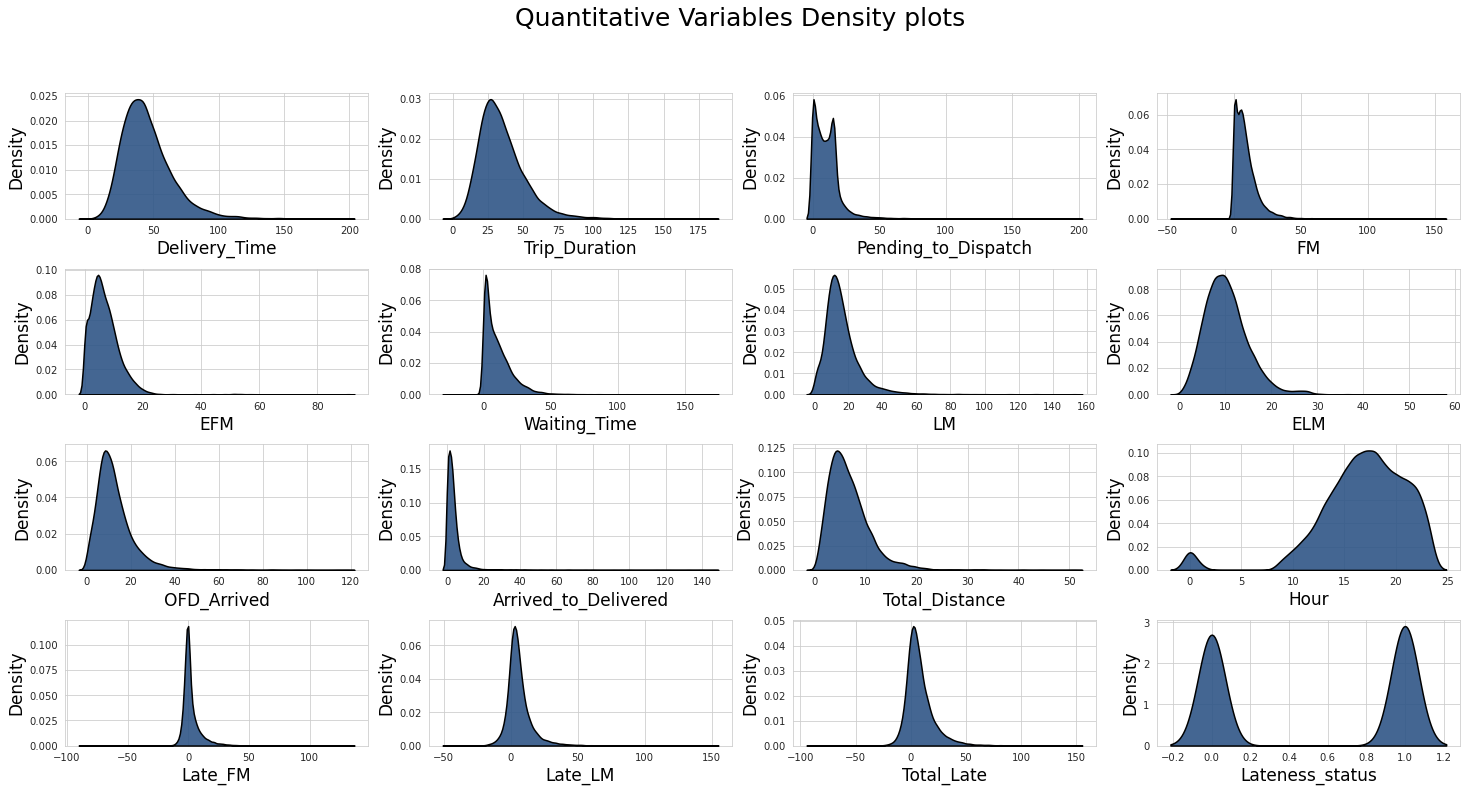

In [43]:
# Quantitative Variables Density plots

sns.set_style("whitegrid")

fig,ax = plt.subplots(4,4,figsize=(25,12))
k=0
j=0
for col in quantitative_features:
    sns.kdeplot(df_clean[col], ax=ax[k,j],
                shade=True,
                color='#2f5586', edgecolor='black',
                linewidth=1.5, alpha=0.9,
                zorder=3,
               )
    
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Density", fontsize=17, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
plt.subplots_adjust(hspace = 0.4, wspace=0.2)
fig.suptitle('Quantitative Variables Density plots', fontsize=25, color="k");

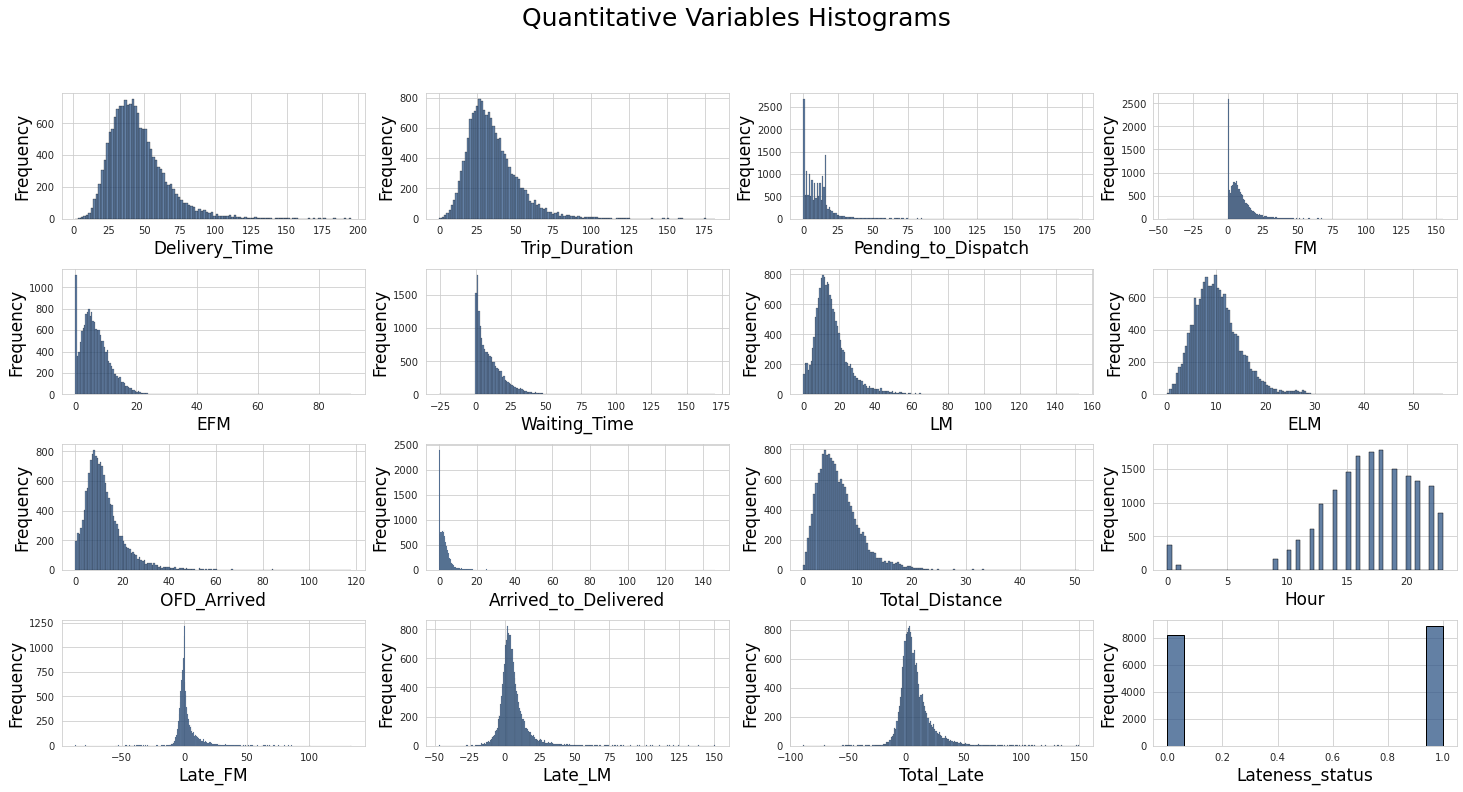

In [79]:
# Quantitative Variables Density plots

sns.set_style("whitegrid")

fig,ax = plt.subplots(4,4,figsize=(25,12))
k=0
j=0
for col in quantitative_features:
    sns.histplot(df_clean[col], ax=ax[k,j],
                #shade=True,
                color='#2f5586', edgecolor='black',
                #linewidth=1.5, alpha=0.9,
                #zorder=3,
               )
    
    ax[k,j].set_xlabel(col, fontsize=17, color="k")
    ax[k,j].set_ylabel("Frequency", fontsize=17, color="k")
    if j>=3:
        k+=1
        j=-1
    j+=1
plt.subplots_adjust(hspace = 0.4, wspace=0.2)
fig.suptitle('Quantitative Variables Histograms', fontsize=25, color="k");

### From above visualizations we can see that:
    
    - Delivery time distribution is right skewed and that means the orders with high delivery time have the less frequency.
    - Trip Duration, LM and FM have right skewed distribution also.

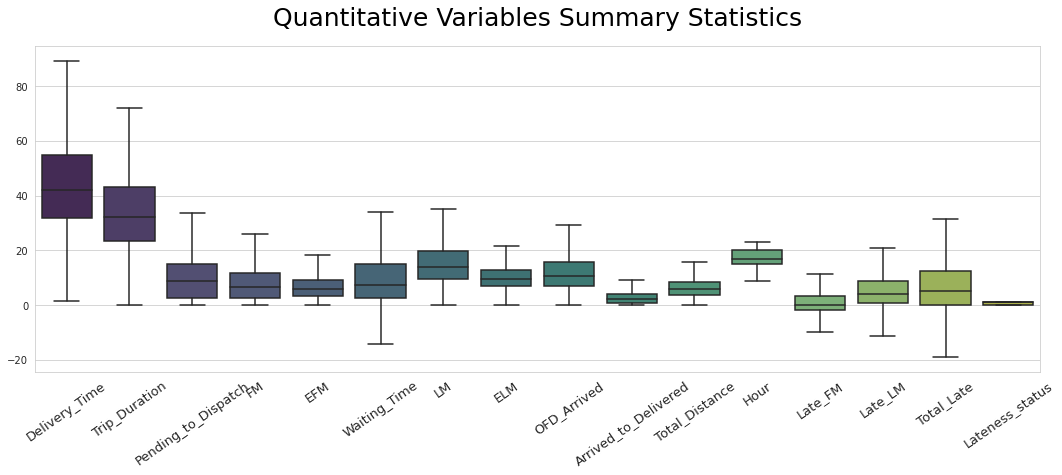

In [76]:
# Quantitative Variables Boxplots

fig = plt.figure(figsize=(18,6))
sns.boxplot(data=df_clean[quantitative_features],saturation=.5, palette="viridis", showfliers = False)
plt.title("Quantitative Variables Summary Statistics", fontsize=25, color="k", pad=20)
plt.xticks(fontsize= 13, rotation=35);

### From above visualizations we can see that:
    
    - 75% from orders have Delivery time less than 55 Minutes.
    - 75% from orders have Trip Duration less than 45 Minutes.
    - 25% from orders have total late more than 12 Minutes.

### Research Point 1
> ####  Delivery duration Per pool.
    
            - Trip_Duration Average.
            - Delivery_Time Average.

In [46]:
# Average Delivery_Time and Trip_Duration per pool

avg_duration = df_clean.groupby("Pool")[["Trip_Duration", "Delivery_Time"]].mean().sort_values("Trip_Duration",ascending=False)
avg_duration

,Trip_Duration,Delivery_Time
Pool,,
Zayed - Palm hills,45.976779,60.866300
Madinaty,43.923725,55.943340
Haram & Faisal,42.298519,55.964015
Zayed - Districts,41.260918,53.387103
Zaytoun & Ain Shams,40.977154,48.103619
Alex East,40.725214,51.345532
Mokattam,39.241104,47.491822
Abbassya & Hadayek El Kobba,38.924360,52.590864
Maadi - Zaharaa,38.606270,49.825897


In [47]:
best_five_pool =avg_duration.sort_values("Trip_Duration", ascending=False).iloc[:5]
best_five_pool

,Trip_Duration,Delivery_Time
Pool,,
Zayed - Palm hills,45.976779,60.866300
Madinaty,43.923725,55.943340
Haram & Faisal,42.298519,55.964015
Zayed - Districts,41.260918,53.387103
Zaytoun & Ain Shams,40.977154,48.103619


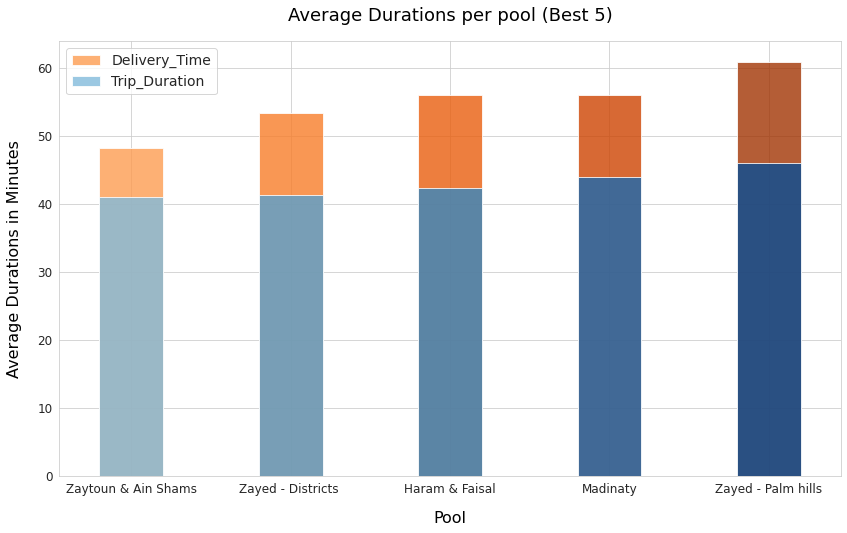

In [48]:
c1 = sns.color_palette("Oranges",8)[3:]
c2 = sns.color_palette("Blues", 8)[3:]

delivery_avg = best_five_pool["Delivery_Time"].sort_values(ascending=True)
delivery_avg.plot(kind="bar",
                      rot = 0,
                      width = 0.40,
                      color=c1,
                      alpha = 0.8,
                      fontsize = 12,
                      figsize=(14,8)
                    )
    
trip_avg = best_five_pool["Trip_Duration"].sort_values(ascending=True)
trip_avg.plot(kind="bar",
              rot = 0,
              width = 0.40,
              color=c2,
              alpha = 0.8,
              fontsize = 12,
              figsize=(14,8)
                )         

plt.ylabel("Average Durations in Minutes",fontsize=16, color="k", labelpad=15)
plt.xlabel("Pool",fontsize=16, color="k", labelpad=15)
plt.title("Average Durations per pool (Best 5)", fontsize=18, color="k", pad=20);


plt.legend(fontsize=14);

In [49]:
worst_five_pool =avg_duration.sort_values("Trip_Duration", ascending=True).iloc[:5]
worst_five_pool

,Trip_Duration,Delivery_Time
Pool,,
Ras Sudr,11.236640,22.346660
Tanta,24.159175,35.540402
El Mansoura,26.593146,36.775163
1-Oct,30.442134,37.664791
Hadayek El Ahram,32.321606,38.697376


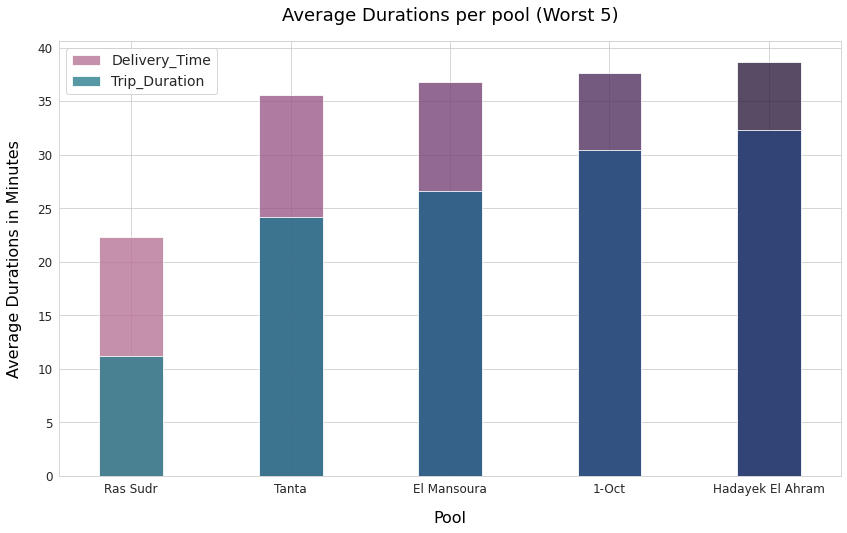

In [50]:
c1 = sns.cubehelix_palette(8)[3:]
c2 = sns.color_palette("crest", 10)[5:]

delivery_avg = worst_five_pool["Delivery_Time"].sort_values(ascending=True)
delivery_avg.plot(kind="bar",
                      rot = 0,
                      width = 0.40,
                      color=c1,
                      alpha = 0.8,
                      fontsize = 12,
                      figsize=(14,8)
                    )
    
trip_avg = worst_five_pool["Trip_Duration"].sort_values(ascending=True)
trip_avg.plot(kind="bar",
              rot = 0,
              width = 0.40,
              color=c2,
              alpha = 0.8,
              fontsize = 12,
              figsize=(14,8)
                )         

plt.ylabel("Average Durations in Minutes",fontsize=16, color="k", labelpad=15)
plt.xlabel("Pool",fontsize=16, color="k", labelpad=15)
plt.title("Average Durations per pool (Worst 5)", fontsize=18, color="k", pad=20);


plt.legend(fontsize=14);

In [51]:
df_clean.groupby("Pool")[["Pending_to_Dispatch"]].mean().sort_values("Pending_to_Dispatch",ascending=False).iloc[:3]

,Pending_to_Dispatch
Pool,
Ras Sudr,41.813883
Zayed - Palm hills,16.830613
Shoubra,15.088918


### Result 1:

**From above visualizations we can see that:**


**1. The best 5 pools in both average Trip_Duration and average Delivery_time are:**

    - Zayed - Palm hills.
    - Madinaty.
    - Haram & Faisal.
    - Zayed - Districts.
    - Zaytoun & Ain Shams.

    

**2. The worst 5 pools in both Trip_Duration average and Delivery_time average are:**

    - Ras Sudr.
    - Tanta.
    - El Mansoura.
    - 1-Oct.
    - Hadayek El Ahram.



**3. The Pending_to_Dispatch average time is the highest in:**

    - Ras Sudr (41.81) min on average.
    - Zayed - Palm hills (16.83) min on average.
    - Shoubra (15:09) min on average.
    


### Research Point 2
> #### The percentage of late trip per pool.

In [52]:
# Lateness percentage per pool

per_delay = df_clean.groupby("Pool")["Lateness_status"].mean().sort_values()*100
per_delay

Pool
Tanta                          17.688266
El Mansoura                    33.275261
New Cairo - AUC                36.842105
1-Oct                          38.356164
Nasr City                      47.188049
Abbassya & Hadayek El Kobba    48.623853
Ras Sudr                       50.000000
M.D.A.Z                        50.120337
New Cairo - neighbourhoods     51.967213
Zayed - Districts              53.941909
Heliopolis - Sheraton          56.433978
Madinaty                       57.754011
Rehab                          57.809695
Maadi - Corniche               57.883050
Heliopolis - Korba             59.926918
Zaytoun & Ain Shams            60.126582
Alex West                      60.990338
New Cairo - Banks              61.633663
Maadi - Zaharaa                61.720808
Shoubra                        62.566845
Hadayek El Ahram               63.963964
Haram & Faisal                 64.062500
Mokattam                       65.497076
Zayed - Palm hills             65.562914
Alex East  

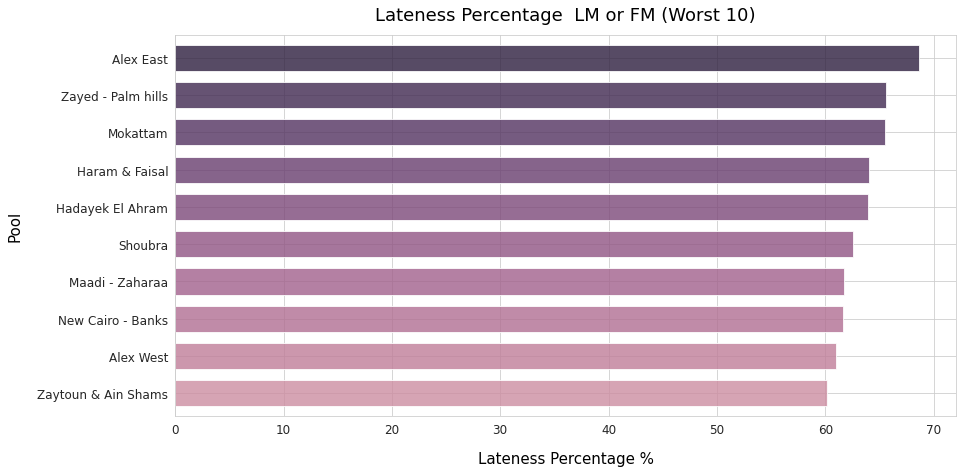

In [53]:
# Lateness Percentage per pool bar plot

c =   sns.cubehelix_palette(14)[4:]
delay = per_delay.iloc[15:].sort_values(ascending=True)
delay.plot(kind="barh",
              rot = 0,
              width = 0.7,
              color=c,
              alpha = 0.8,
              fontsize = 12,
              figsize=(14,7)
                )


plt.xlabel("Lateness Percentage %",fontsize=15, color="k", labelpad=15)
plt.ylabel("Pool",fontsize=15, color="k",labelpad=15)
plt.title("Lateness Percentage  LM or FM (Worst 10)", fontsize=18, color="k", pad=15);

### Result 2:

**. The worst ten pools on Lateness Percentage are:**

    (Late_LM or Late_FM more than or equal to 5 Minutes)

    - Alex East                      68.66 % Latness  
    - Zayed - Palm hills             65.56 % Latness 
    - Mokattam                       65.50 % Latness 
    - Hadayek El Ahram               64.25 % Latness 
    - Haram & Faisal                 64.06 % Latness 
    - Shoubra                        63.59 % Latness 
    - Maadi - Zaharaa                62.21 % Latness 
    - New Cairo - Banks              61.94 % Latness 
    - Alex West                      61.21 % Latness 
    - Zaytoun & Ain Shams            60.51 % Latness 
    

### Research Point 3

> #### The percentage of violators with late trips per pool.

In [54]:
total_drivers = df_clean.groupby("Pool")["Driver_Id"].count()
total_drivers

Pool
1-Oct                           652
Abbassya & Hadayek El Kobba     109
Alex East                       365
Alex West                       823
El Mansoura                    1136
Hadayek El Ahram                220
Haram & Faisal                  383
Heliopolis - Korba              820
Heliopolis - Sheraton          1183
M.D.A.Z                        1656
Maadi - Corniche               1343
Maadi - Zaharaa                1127
Madinaty                        559
Mokattam                        170
Nasr City                      2263
New Cairo - AUC                 695
New Cairo - Banks               400
New Cairo - neighbourhoods      606
Ras Sudr                          6
Rehab                           556
Shoubra                         182
Tanta                           567
Zayed - Districts               720
Zayed - Palm hills              300
Zaytoun & Ain Shams             155
Name: Driver_Id, dtype: int64

In [55]:
violators_per_pool = df_clean[df_clean.Lateness_status == True].groupby("Pool")["Driver_Id"].count()
violators_per_pool

Pool
1-Oct                           252
Abbassya & Hadayek El Kobba      53
Alex East                       252
Alex West                       505
El Mansoura                     382
Hadayek El Ahram                142
Haram & Faisal                  246
Heliopolis - Korba              492
Heliopolis - Sheraton           671
M.D.A.Z                         833
Maadi - Corniche                782
Maadi - Zaharaa                 703
Madinaty                        324
Mokattam                        112
Nasr City                      1074
New Cairo - AUC                 259
New Cairo - Banks               249
New Cairo - neighbourhoods      317
Ras Sudr                          3
Rehab                           322
Shoubra                         117
Tanta                           101
Zayed - Districts               390
Zayed - Palm hills              198
Zaytoun & Ain Shams              95
Name: Driver_Id, dtype: int64

In [56]:
violators_percent_pool =  (violators_per_pool / total_drivers) * 100
violators_percent_pool.sort_values(ascending=True)

Pool
Tanta                          17.813051
El Mansoura                    33.626761
New Cairo - AUC                37.266187
1-Oct                          38.650307
Nasr City                      47.459125
Abbassya & Hadayek El Kobba    48.623853
Ras Sudr                       50.000000
M.D.A.Z                        50.301932
New Cairo - neighbourhoods     52.310231
Zayed - Districts              54.166667
Heliopolis - Sheraton          56.720203
Rehab                          57.913669
Madinaty                       57.960644
Maadi - Corniche               58.227848
Heliopolis - Korba             60.000000
Zaytoun & Ain Shams            61.290323
Alex West                      61.360875
New Cairo - Banks              62.250000
Maadi - Zaharaa                62.377995
Haram & Faisal                 64.229765
Shoubra                        64.285714
Hadayek El Ahram               64.545455
Mokattam                       65.882353
Zayed - Palm hills             66.000000
Alex East  

In [57]:
t = pd.concat([total_drivers,violators_per_pool,violators_percent_pool], axis=1)
#t = t.reset_index
t.columns = ["Total_Drivers", "Violators_Drivers", "Violators_Percentage"]
t.sort_values("Violators_Percentage", ascending=False)

,Total_Drivers,Violators_Drivers,Violators_Percentage
Pool,,,
Alex East,365,252,69.041096
Zayed - Palm hills,300,198,66.000000
Mokattam,170,112,65.882353
Hadayek El Ahram,220,142,64.545455
Shoubra,182,117,64.285714
Haram & Faisal,383,246,64.229765
Maadi - Zaharaa,1127,703,62.377995
New Cairo - Banks,400,249,62.250000
Alex West,823,505,61.360875


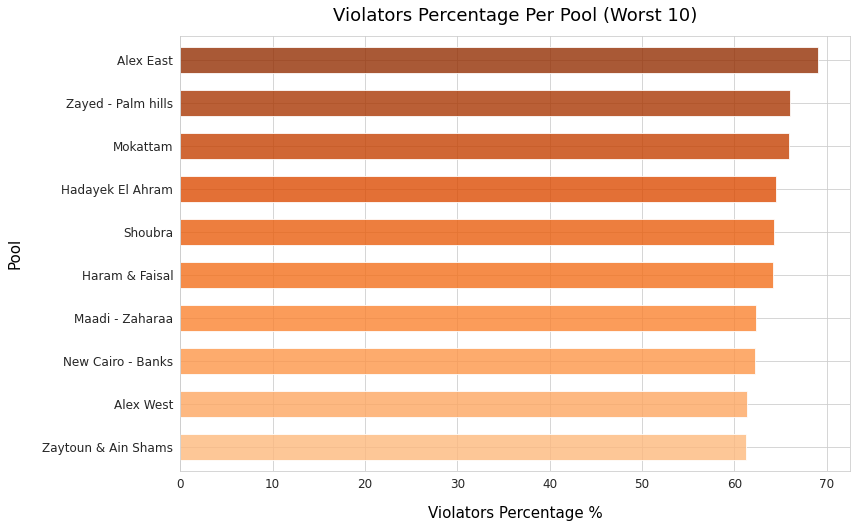

In [58]:
# Violators with Lateness Percentage per pool bar plot

c = sns.color_palette("Oranges", 14)[4:]

violators_per_ten = violators_percent_pool.sort_values(ascending=False).iloc[:10]
violators_per_ten.sort_values(ascending=True).plot(kind="barh",
                          rot = 0,
                          width = 0.60,
                          color=c,
                          alpha = 0.8,
                          fontsize = 12,
                          figsize=(12,8)
                                        )
                    

plt.xlabel("Violators Percentage %",fontsize=15, color="k", labelpad=15)
plt.ylabel("Pool",fontsize=15, color="k",labelpad=20)
plt.title("Violators Percentage Per Pool (Worst 10)", fontsize=18, color="k", pad=15); 

### Result 3:

**. The worst ten pools on Violators percentage in FM or LM are:**


    - Alex East             69.04 %
    - Zayed - Palm hills    66 %
    - Mokattam              65.88 %
    - Hadayek El Ahram	  64.55 %
    - Shoubra	   	    64.29 %
    - Haram & Faisal	    64.23%
    - Maadi - Zaharaa	   62.32%
    - New Cairo - Banks	 62.25%
    - Alex West	         61.36%
    - Zaytoun & Ain Shams   61.29% 




        - 	
             

### Research Point 4

> #### LM & FM Lateness Trend per Hour

In [59]:
lm_late_mean = df_clean.groupby("Hour")["Late_LM"].mean()
lm_late_mean

Hour
0     5.147027
1     6.119605
9     3.298553
10    4.854023
11    4.705568
12    5.118655
13    4.602807
14    4.315350
15    5.384964
16    5.428399
17    6.002644
18    7.049210
19    6.728816
20    6.758949
21    6.875647
22    6.376802
23    6.160256
Name: Late_LM, dtype: float64

In [60]:
fm_late_mean = df_clean.groupby("Hour")["Late_FM"].mean()
fm_late_mean

Hour
0     0.208676
1    -0.418473
9     3.579419
10    1.189103
11    1.096242
12    2.241430
13    1.716494
14    1.347807
15    1.821782
16    1.524163
17    1.724573
18    1.709465
19    2.372816
20    2.601342
21    2.916602
22    2.527593
23    2.210012
Name: Late_FM, dtype: float64

In [61]:
lm_late_total = df_clean.groupby("Hour")["Late_LM"].sum()
lm_late_total

Hour
0      1847.7826
1       452.8508
9       531.0671
10     1368.8344
11     2042.2163
12     3045.5995
13     4400.2837
14     5023.0675
15     7657.4188
16     8946.0020
17    10138.4661
18    12188.0834
19     9756.7833
20     9090.7861
21     8677.0666
22     7486.3658
23     4885.0834
Name: Late_LM, dtype: float64

In [62]:
fm_late_total = df_clean.groupby("Hour")["Late_FM"].sum()
fm_late_total

Hour
0       76.166800
1      -30.966967
9      594.183600
10     340.083367
11     481.250367
12    1342.616633
13    1654.700267
14    1587.716433
15    2636.117933
16    2548.400100
17    2962.815600
18    2994.982867
19    3511.767267
20    3587.250600
21    3765.333233
22    3038.167333
23    1810.000133
Name: Late_FM, dtype: float64

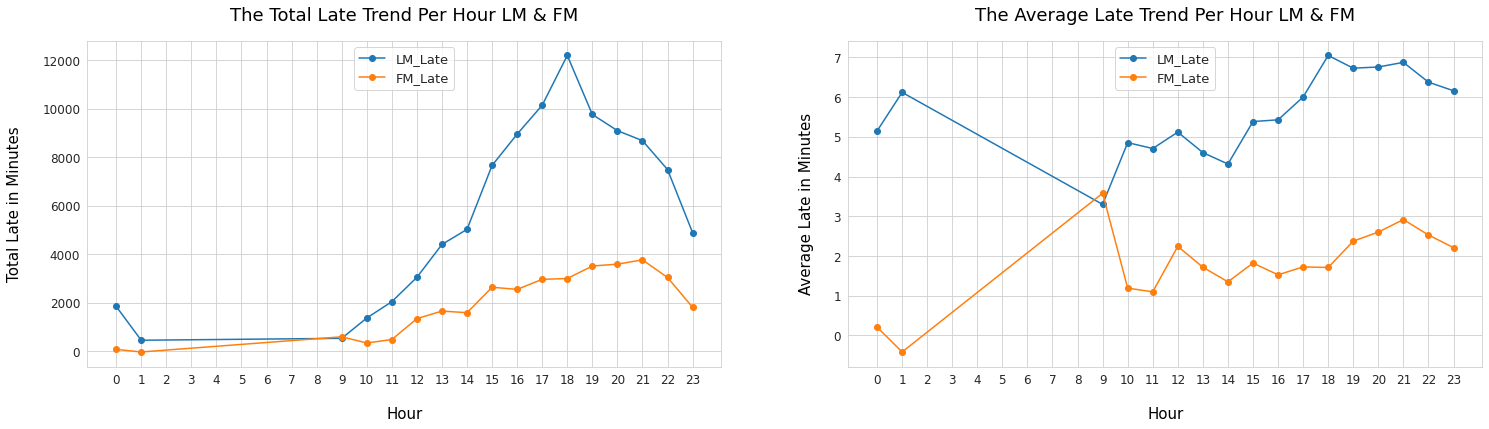

In [63]:
fig,ax = plt.subplots(1,2,figsize=(25,6))



lm_late_total.plot( marker="o",
                    alpha = 1,
                    fontsize = 12,
                     ax=ax[0], label="LM_Late")

fm_late_total.plot( marker="o",
                    alpha = 1,
                    fontsize = 12,
                     ax=ax[0], label="FM_Late")

lm_late_mean.plot( marker="o",
                    alpha = 1,
                    fontsize = 12,
                     ax=ax[1], label="LM_Late")
fm_late_mean.plot( marker="o",
                    alpha = 1,
                    fontsize = 12,
                     ax=ax[1], label="FM_Late")




xlbl = np.arange(0,24)



ax[0].set_xlabel("Hour",fontsize=15, color="k", labelpad=20, ha="center")
ax[0].set_ylabel("Total Late in Minutes",fontsize=15, color="k", labelpad=20, ha="center")
ax[0].set_title("The Total Late Trend Per Hour LM & FM", fontsize=18, color="k", pad=20)
ax[0].set_xticks( xlbl)
ax[0].legend(fontsize=13, loc=9)

ax[1].set_xlabel("Hour",fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_ylabel("Average Late in Minutes",fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_title("The Average Late Trend Per Hour LM & FM", fontsize=18, color="k", pad=20)
ax[1].set_xticks( xlbl)
ax[1].legend(fontsize=13, loc=9);


In [64]:
total_late_sum = df_clean.groupby("Hour")["Total_Late"].sum()
total_late_sum

Hour
0      1930.082833
1       421.883833
9      1129.034033
10     1716.384400
11     2511.900000
12     4372.116133
13     6035.783900
14     6564.750300
15    10226.853533
16    11483.735367
17    12917.464833
18    15080.216400
19    13173.067367
20    12339.336766
21    12081.482900
22    10154.999800
23     6622.533467
Name: Total_Late, dtype: float64

In [65]:
total_late_avg = df_clean.groupby("Hour")["Total_Late"].mean()
total_late_avg

Hour
0     5.376275
1     5.701133
9     7.012634
10    6.086470
11    5.787788
12    7.348094
13    6.313581
14    5.639820
15    7.191880
16    6.968286
17    7.652527
18    8.732030
19    9.084874
20    9.174228
21    9.573283
22    8.649915
23    8.351240
Name: Total_Late, dtype: float64

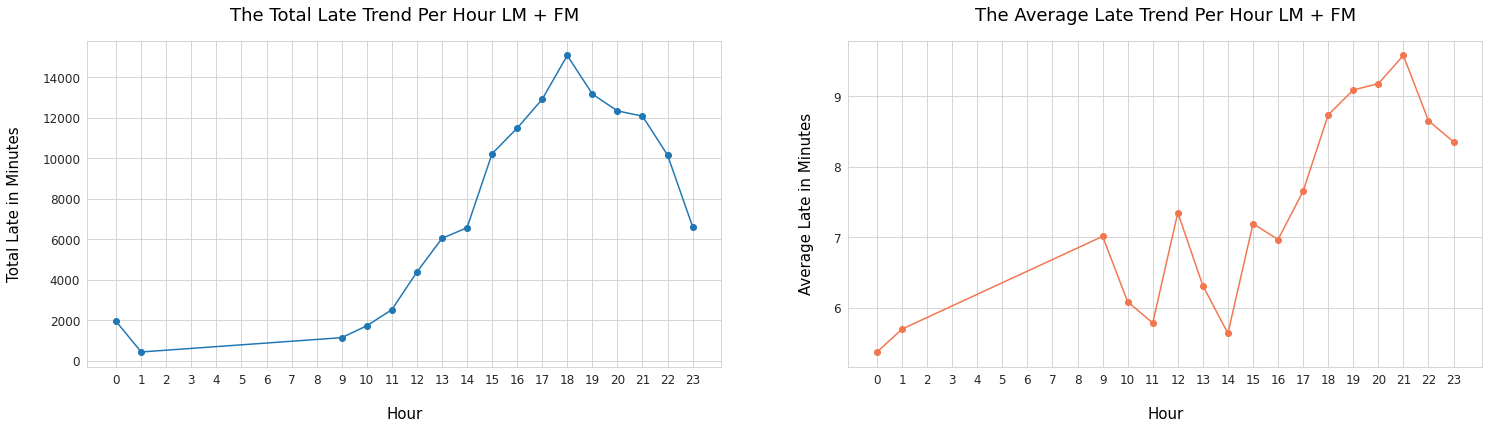

In [66]:
fig,ax = plt.subplots(1,2,figsize=(25,6))

c = sns.color_palette("rocket")[4:5]
total_late_sum.plot( marker="o",
                    alpha = 1,
                    fontsize = 12,
                    label="Total Late", ax=ax[0])

total_late_avg.plot( marker="o",
                    alpha = 1,
                    fontsize = 12,color=c,
                     label="Average Late" , ax=ax[1])

xlbl = np.arange(0,24)



ax[0].set_xlabel("Hour",fontsize=15, color="k", labelpad=20, ha="center")
ax[0].set_ylabel("Total Late in Minutes",fontsize=15, color="k", labelpad=20, ha="center")
ax[0].set_title("The Total Late Trend Per Hour LM + FM", fontsize=18, color="k", pad=20)
ax[0].set_xticks( xlbl)

ax[1].set_xlabel("Hour",fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_ylabel("Average Late in Minutes",fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_title("The Average Late Trend Per Hour LM + FM", fontsize=18, color="k", pad=20)
ax[1].set_xticks(xlbl);


**There is no skwness in variables distributions that indecates any strong point related Lateness time.**

### Result 4:

**From above visualizations we can see that:**

    - The highest LM Lateness total at 18:00 O'clock.
    - The highest FM Lateness total at 21:00 O'clock.
    - The highest LM Lateness average at 18:00 O'clock.
    - The highest FM Lateness average at 09:00 O'clock.
    
    - The highest Lateness Total of LM + FM is at 18:00 O'clock.
    - The highest Lateness Average of LM + FM is at 21:00 O'clock.
    
**So we need to pay more effort on hours 09:00, 18:00 and 21:00 to decrease Lateness time like raise EFM and ELM time a little**

### Research Point 5

> #### Correlation Between Late_LM and Total_Distance. 
> #### Correlation Between Late_LM and Waiting_Time.
> #### Correlation Between Late_FM and Total_Distance.
> #### Correlation Between Late_FM and Waiting_Time .

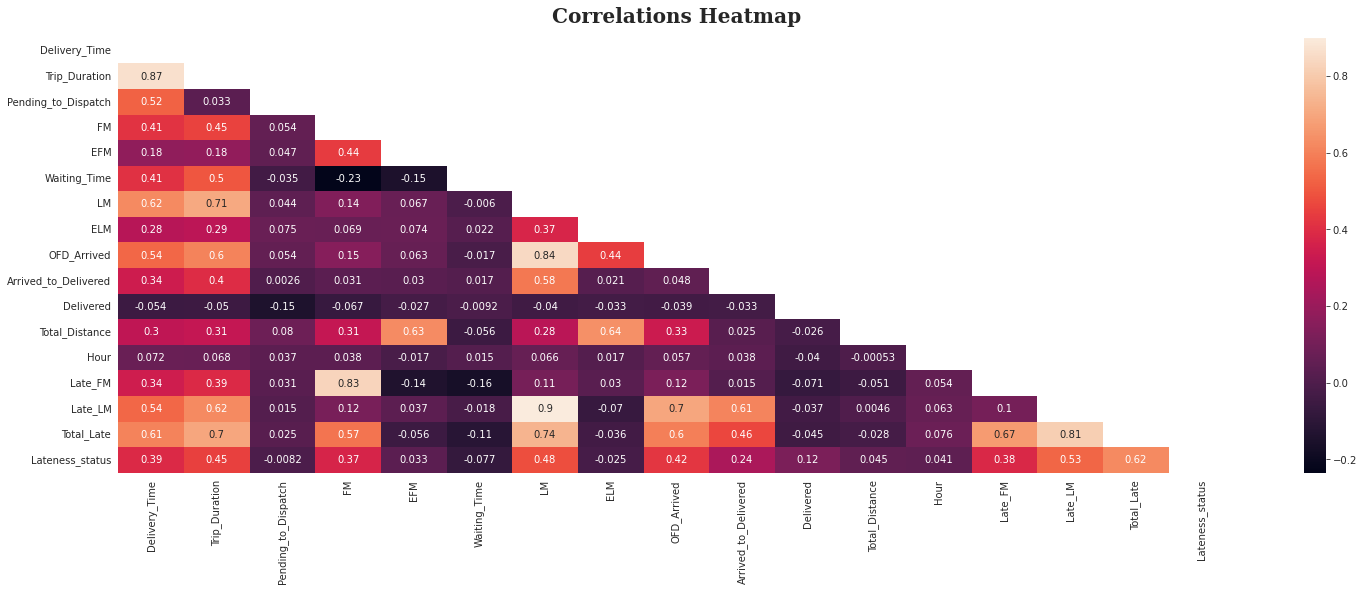

In [67]:
# Check correlation with heatmap

fig, ax = plt.subplots(figsize=(25,8))
corr_matrix = df_clean.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, mask=mask );

plt.title( 'Correlations Heatmap', fontsize=20, fontweight='bold', fontfamily='serif', pad=15);


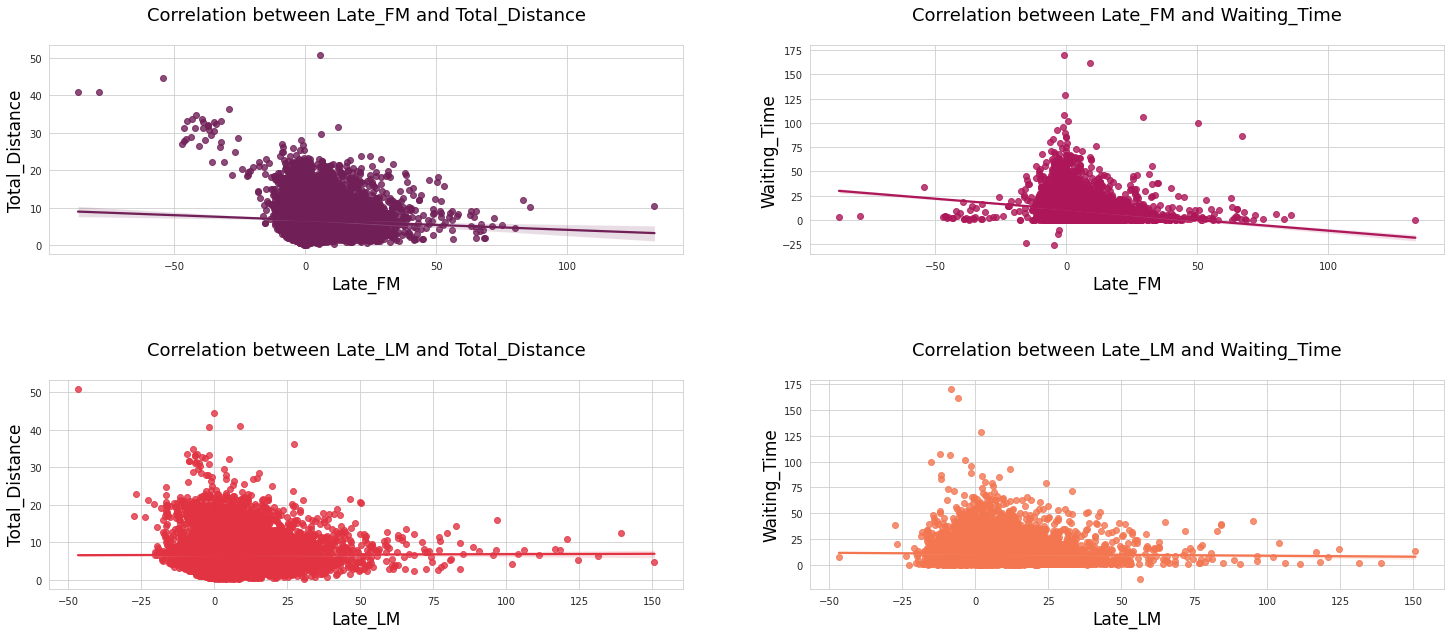

In [68]:
# Scatter plot between Profit and (Revenue, Quantity and Cost)

c = sns.color_palette("rocket")[1:5]

fig,ax = plt.subplots(2,2,figsize=(25,10))
k=0
j=0
i = 0
for col in ["Late_FM", "Late_LM"]:
    for row in ["Total_Distance", "Waiting_Time"]:
        sns.regplot(data = df_clean, x = col, y = row, ax = ax[k,j], color= c[i])
        i+=1
        ax[k,j].set_xlabel(col, fontsize=17, color="k")
        ax[k,j].set_ylabel(row, fontsize=17, color="k")
        ax[k,j].set_title("Correlation between {} and {}".format(col, row), fontsize=18, color="k", pad=25)
        if j>=1:
            k+=1
            j=-1
        j+=1
    
#fig.suptitle('Correlation between Late_FM, Late_LM, Total_Distance and Waiting_Time', fontsize=25, color="k")
plt.subplots_adjust(hspace = 0.6, wspace=0.2);

### Result 5:

**From above visualizations we can see that:**

    - There is no strong correlation between Waiting_Time and Late_LM.
    - There is no strong correlation between Waiting_Time and Late_FM.
    - There is no strong correlation between Total_Distance and Late_LM.
    - There is no strong correlation between Total_Distance and Late_FM.

### Research Point 6

> #### Drivers Evaluation


In [69]:
total_drivers = df_clean.groupby("Pool")["Driver_Id"].count()
total_drivers

Pool
1-Oct                           652
Abbassya & Hadayek El Kobba     109
Alex East                       365
Alex West                       823
El Mansoura                    1136
Hadayek El Ahram                220
Haram & Faisal                  383
Heliopolis - Korba              820
Heliopolis - Sheraton          1183
M.D.A.Z                        1656
Maadi - Corniche               1343
Maadi - Zaharaa                1127
Madinaty                        559
Mokattam                        170
Nasr City                      2263
New Cairo - AUC                 695
New Cairo - Banks               400
New Cairo - neighbourhoods      606
Ras Sudr                          6
Rehab                           556
Shoubra                         182
Tanta                           567
Zayed - Districts               720
Zayed - Palm hills              300
Zaytoun & Ain Shams             155
Name: Driver_Id, dtype: int64

In [70]:
violators = df_clean.groupby(["Pool","Driver_Id"]).agg({"Lateness_status":"mean", "Total_Distance":"count", "Total_Late":"sum"})#.to_frame()
violators.reset_index(inplace=True)
violators_df = violators.copy()
violators_df.rename(columns={"Lateness_status":"Lateness_Percentage","Total_Distance":"Orders_Count" }, inplace=True)
violators_df["Lateness_Percentage"] = violators_df.Lateness_Percentage*100

In [71]:
violators_df

,Pool,Driver_Id,Lateness_Percentage,Orders_Count,Total_Late
0,1-Oct,083f9e86-5633-41a8-bc91-aa5090a92bc4,27.777778,17,57.083067
1,1-Oct,0d208c2b-d40e-4bbc-916f-f10e29f4b2cb,54.166667,24,161.666733
2,1-Oct,0ea49eaf-46e7-4f58-a6fd-d88f2fe1b877,7.692308,13,-37.266333
3,1-Oct,134f3dd7-0a59-4827-9c20-1309ec609731,40.909091,22,130.466800
4,1-Oct,303dd092-ffe0-4f23-b5b0-26e04977ab04,23.333333,30,-15.199733
...,...,...,...,...,...
1084,Zaytoun & Ain Shams,92bf625a-124f-41e3-8a1f-1602306739fc,100.000000,4,114.216700
1085,Zaytoun & Ain Shams,a1f1e122-5fef-41d2-a422-df1ad3329ca4,81.818182,11,129.583367
1086,Zaytoun & Ain Shams,b0b159ba-0c3b-4aa6-926a-cab224d71e32,36.842105,19,133.916200
1087,Zaytoun & Ain Shams,e17e0ec0-7273-4379-a9be-929139f437e9,50.000000,2,30.316633


In [72]:
# violators with lateness percentage between 70 and 90 % and order count more than 10

violators_70_to_90 = violators_df[(violators_df.Lateness_Percentage >=70) &
             (violators_df.Lateness_Percentage <=90) &
            (violators_df.Orders_Count >10)].copy().to_csv("Drivers_need_coaching.csv", index=False)

In [73]:
# violators with lateness percentage more than 90 % and order count more than 10

violators_over90 = violators_df[(violators_df.Lateness_Percentage >90) &
            (violators_df.Orders_Count >10)].copy().to_csv("Drivers_need_actions.csv", index=False)

In [74]:
# violator Drivers which need coaching

Driver_to_coach = pd.read_csv("Drivers_need_coaching.csv")
Driver_to_coach.head(20).sort_values("Lateness_Percentage", ascending=False)

,Pool,Driver_Id,Lateness_Percentage,Orders_Count,Total_Late
4,Alex East,0c2f3af2-6b78-400b-9f28-a1d5b6076132,86.666667,15,334.816433
18,Alex West,ad95df21-a01c-49ef-b58c-2a056c07c206,83.333333,12,133.516867
16,Alex West,99b149c9-7934-46c5-bfbb-caa3e54ff8b5,83.333333,22,312.299867
15,Alex West,7d9467d4-5a2c-46e3-8820-ae51ec7b1ee6,83.333333,18,278.850033
11,Alex West,47321a43-9a50-452f-8d0a-1696020abdd7,81.250000,16,164.066567
10,Alex West,3569dbf4-8c1e-423e-81e8-4f653b1b0424,80.000000,20,143.716767
9,Alex West,33693d7a-0ba7-4e46-8db1-aaaf531ac120,80.000000,20,304.949767
12,Alex West,5b1c7cbf-3d42-4382-978c-50221e33c68e,80.000000,15,190.433267
7,Alex East,a83ce027-cc9d-456b-80ec-45976d662bfb,79.310345,28,361.499633
19,Alex West,bd0e956e-4451-48e3-ac12-abdeef470792,79.166667,24,331.850500


In [75]:
# violator Drivers which need actions


Driver_to_action = pd.read_csv("Drivers_need_actions.csv")
Driver_to_action.head(20).sort_values("Lateness_Percentage", ascending=False)

,Pool,Driver_Id,Lateness_Percentage,Orders_Count,Total_Late
19,Madinaty,62b2815a-82e6-4707-9b38-78bf196661ee,100.000000,18,356.133467
18,Maadi - Zaharaa,4fdba9c8-ad22-4cc3-a560-63b5d71d46cb,100.000000,15,304.883433
4,Haram & Faisal,8e914b9b-d1e1-4c00-9c1f-a6dd524754d2,100.000000,12,193.283267
17,Maadi - Zaharaa,481acb7d-16c4-4cfa-ba1f-cedec72b926b,100.000000,17,260.600067
6,Heliopolis - Korba,5963ef33-bbaa-4af5-9d06-610a8b70d596,100.000000,14,291.133000
16,Maadi - Corniche,bb1556e8-0840-421d-8d5a-9c6651b7a26d,100.000000,18,327.766533
9,M.D.A.Z,146f58b1-c9c2-4c65-86ec-2a87ec4e966c,100.000000,12,318.883400
15,Maadi - Corniche,9a43924f-a112-48fe-8dbe-b6b584b02704,100.000000,11,260.566467
12,M.D.A.Z,a1723122-4551-4d5f-a3ba-7087b0f181ec,95.000000,20,359.799567
8,Heliopolis - Sheraton,23a923f9-17a6-48d5-aa6f-2375634a50f4,94.117647,17,210.966833


<a id='conclusions'></a>
## Conclusions


**1. Delivery time distribution is right skewed and that means the orders with high delivery time have the less frequency. Trip Duration, LM and FM also have right skewed distribution.**


**2. 75% from orders have Delivery time less than 55 Minutes.**

**3. 75% from orders have Trip Duration less than 45 Minutes.**

**4. 25% from orders have total late more than 12 Minutes.**

**5. The best 5 pools in both average Trip_Duration and average Delivery_time are:**

        - Zayed - Palm hills.
        - Madinaty.
        - Haram & Faisal.
        - Zayed - Districts.
        - Zaytoun & Ain Shams.



**6. The worst 5 pools in both Trip_Duration average and Delivery_time average are:**

        - Ras Sudr.
        - Tanta.
        - El Mansoura.
        - 1-Oct.
        - Hadayek El Ahram.



**7. The Pending_to_Dispatch average time is the highest in:**

        - Ras Sudr (41.81) min on average.
        - Zayed - Palm hills (16.83) min on average.
        - Shoubra (15:09) min on average.




**8. The worst pools on Lateness Percentage are:**

        (Late_LM or Late_FM more than or equal to 5 Minutes)

        - Alex East                      68.66 % Latness  
        - Zayed - Palm hills             65.56 % Latness 
        - Mokattam                       65.50 % Latness 


**9. The worst ten pools on Violators percentage in FM or LM are:**

        - Alex East             69.04 %
        - Zayed - Palm hills    66 %
        - Mokattam              65.88 %


**10. We need to pay more effort on hours 09:00, 18:00 and 21:00 to decrease Lateness time:**

        - The highest LM Lateness total at 18:00 O'clock.
        - The highest FM Lateness total at 21:00 O'clock.
        - The highest LM Lateness average at 18:00 O'clock.
        - The highest FM Lateness average at 09:00 O'clock.
        - The highest Lateness Total of LM + FM is at 18:00 O'clock.
        - The highest Lateness Average of LM + FM is at 21:00 O'clock.


**11. There are no strong correlations to consider between:**

        - Waiting_Time and Late_LM.
        - Waiting_Time and Late_FM.
        - Total_Distance and Late_LM.
        - Total_Distance and Late_FM. 

<a id='Actions'></a>

## Suggested Actions


    
**1. - Every Pool manager should observe Drivers with Lateness Percentage between 70% and 90%, make fast meeting with them and try to find the reason behind high lateness percentage from total orders they delivered.**

**2. - Observe Drivers with Lateness Percentage more than 90% as well you may find another issues with their performance. Take the necessary actions with them**

**3. Collect more data about drivers to analyze their behaviour and find out the reasons behind high lateness percentage to avoid in the future**

**4.Pay more effort on hours 09:00, 18:00 and 21:00 to decrease Lateness time:**

     - Raise EFM and ELM time alittle to avoid lateness.
     - Manage breaks to not intersect with this hours.

## Limitations

**1.  There is a lot of empty values in each columns specially columns that indicates lateness which may affect our analysis accuracy.**

**2.There are typing or data entry issues. Delivery_Time couldn't be 296.63 minutes and Late_FM couldn't be - 86.8.**

**3.Finally to evaluate Drivers performance effectively we need more data about them like their behavior and working hours and customer rating.**